# What is HDF?

* it stands for Hierarchical Data Format
* allows for organizing data
* especially useful for large amounts of data (has a binary format)
* NeXus files are hdf5 files
* one can use hdfview or NeXpy to look at the content

<img src='hdfview.png'>

* the information is organized in groups and datasets
* one can have attributes to describe each field

For more information, go to https://portal.hdfgroup.org/display/HDF5/HDF5

In [1]:

!ls Data/HDF

HYS_13656_event.nxs HYS_181000.nxs.h5


h5py is a library for working with hdf5 files
open an instance to the hdf 5 file with the File command.

In [2]:
import h5py

f=h5py.File('Data/HDF/HYS_13656_event.nxs')

use the keys method to access the file

In [3]:
list(f.keys())

['entry']

In [5]:
list(f['entry'].keys())

['DASlogs',
 'SNSHistoTool',
 'bank1',
 'bank10',
 'bank10_events',
 'bank11',
 'bank11_events',
 'bank12',
 'bank12_events',
 'bank13',
 'bank13_events',
 'bank14',
 'bank14_events',
 'bank15',
 'bank15_events',
 'bank16',
 'bank16_events',
 'bank17',
 'bank17_events',
 'bank18',
 'bank18_events',
 'bank19',
 'bank19_events',
 'bank1_events',
 'bank2',
 'bank20',
 'bank20_events',
 'bank2_events',
 'bank3',
 'bank3_events',
 'bank4',
 'bank4_events',
 'bank5',
 'bank5_events',
 'bank6',
 'bank6_events',
 'bank7',
 'bank7_events',
 'bank8',
 'bank8_events',
 'bank9',
 'bank9_events',
 'collection_identifier',
 'collection_title',
 'definition',
 'duration',
 'end_time',
 'entry_identifier',
 'experiment_identifier',
 'instrument',
 'monitor2',
 'monitor3',
 'notes',
 'proton_charge',
 'raw_frames',
 'run_number',
 'sample',
 'start_time',
 'title',
 'total_counts',
 'total_other_counts',
 'total_uncounted_counts',
 'user1',
 'user2',
 'user3']

In [13]:
# one can use compound path
for k in f['entry/DASlogs'].keys():
    print(k)

A1HCenter
A1HCenterOffset
A1HWidth
A1VCenter
A1VCenterOffset
A1VHeight
A2HCenter
A2HCenterOffset
A2HWidth
A2VCenter
A2VCenterOffset
A2VHeight
ChopperStatus1
ChopperStatus2
ChopperStatus3
ChopperStatus4
EnergyRequest
LambdaRequest
Monitor131073
Monitor196609
Phase1
Phase2
Phase3
Phase4
PhaseRequest1
PhaseRequest2
PhaseRequest3
PhaseRequest4
SP1
SP2
SensorA
SensorB
SensorC
SensorD
SetpointLP1
SetpointLP2
Special3_131073
Special3_196609
Special3_262145
Special3_65537
Speed1
Speed2
Speed3
Speed4
SpeedRequest1
SpeedRequest2
SpeedRequest3
SpeedRequest4
TolLP1
TolLP2
Veto_pulse
a1b
a1l
a1r
a1sd
a1t
a2b
a2l
a2r
a2sd
a2t
fineRad
frequency
guideB
he3Filter
he3Flip
helmholtz
m1hu
m1huOffset
m1pg
m1pgOffset
m2
m2Offset
mel
mezeiIn
mfhu
mfhuOffset
mfpg
mfpgOffset
mghu
mgpg
mon3sd
msd
msdOffset
mthu
mtpg
polSupArr
polSupFlip
proton_charge
s1
s1Offset
s1VelSel
s2
s2Offset
scol20
scol40
sgl
sglOffset
sgu
sguOffset
shutter
shutterPosition
stl
stu
tertiary
tertiaryPosition
vM2
vMel
vMsdFixed
vProtected


In [14]:
s1=f['entry/DASlogs/s1']

In [17]:
for k in s1.attrs.keys():
    print(k)

NX_class


In [31]:
for k in s1['time'].attrs.keys():
    print(k)

start
units


In [36]:
time_u=str(s1['time'].attrs['units'],'utf-8')

In [37]:
time_u

'second'

In [22]:
for v in s1.values():
    print(v)

<HDF5 dataset "average_value": shape (1,), type "<f4">
<HDF5 dataset "average_value_error": shape (1,), type "<f4">
<HDF5 dataset "duration": shape (1,), type "<f4">
<HDF5 dataset "effective_value": shape (1,), type "<f4">
<HDF5 dataset "maximum_value": shape (1,), type "<f4">
<HDF5 dataset "minimum_value": shape (1,), type "<f4">
<HDF5 dataset "requested_value": shape (6,), type "<f4">
<HDF5 dataset "time": shape (68718,), type "<f4">
<HDF5 dataset "value": shape (68718,), type "<f4">


In [25]:
av=s1['average_value']

In [26]:
print(av.name)
av.value

/entry/DASlogs/s1/average_value


array([ 45.08166885], dtype=float32)

In [27]:
s1_value=s1['value'].value

In [38]:
for k in s1['value'].attrs.keys():
    print(k)

units


In [39]:
value_u=str(s1['value'].attrs['units'],'utf-8')

In [28]:
s1_time=s1['time'].value

<IPython.core.display.Javascript object>


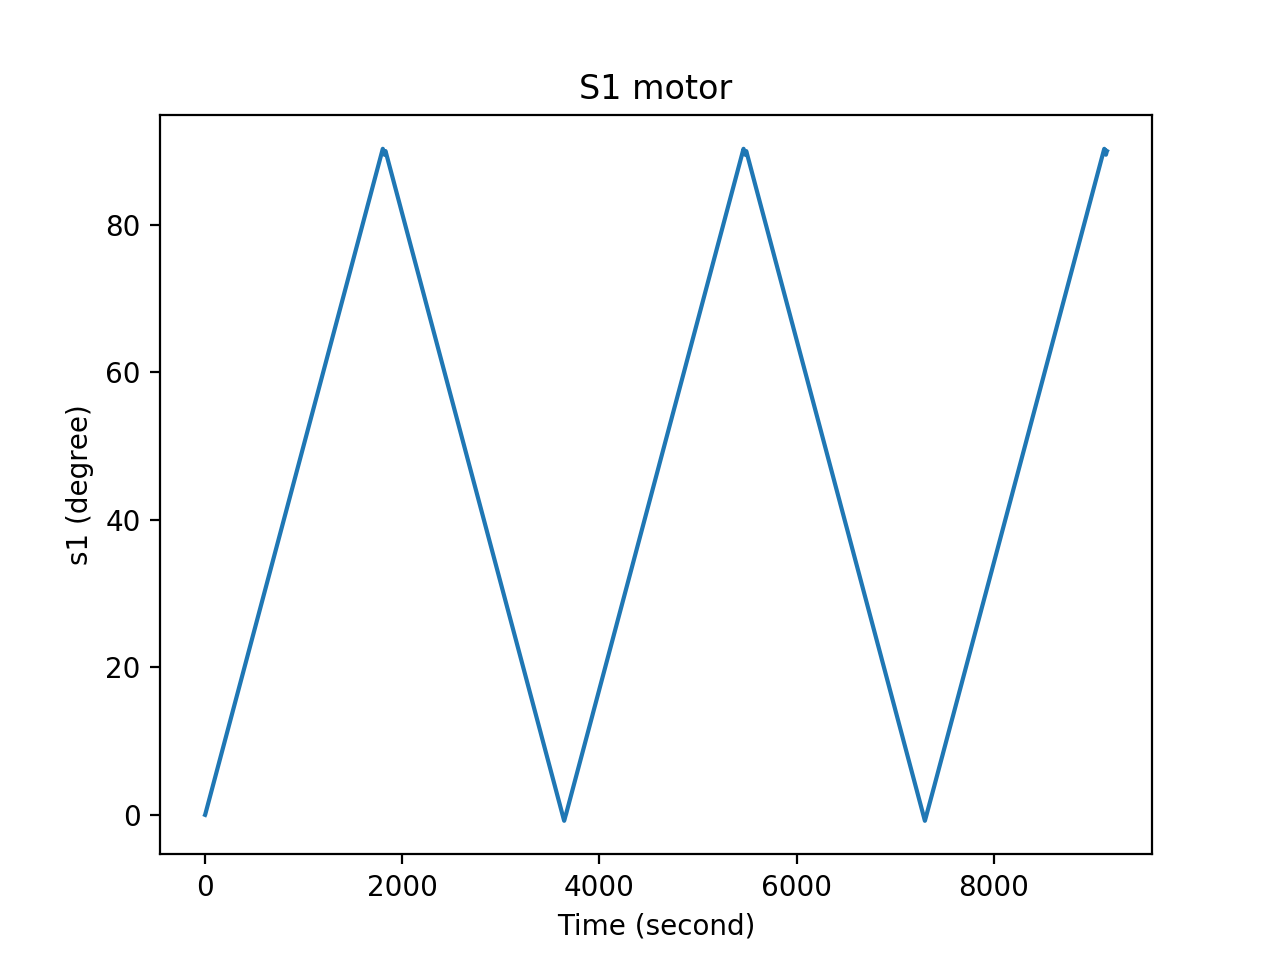

Text(0,0.5,'s1 (degree)')

In [41]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(s1_time,s1_value)
ax.set_title('S1 motor')
ax.set_xlabel('Time ({})'.format(time_u))
ax.set_ylabel('s1 ({})'.format(value_u))

In [16]:
s1['time'].attrs['start']

'2013-01-13T14:36:16.837-05:00'

In [17]:
def print_attrs(name, obj):
    print(name)
    for key, val in obj.attrs.iteritems():
        print("  {0}: {1}".format(key, val))

f.visititems(print_attrs)

entry
  NX_class: NXentry
entry/DASlogs
  NX_class: NXgroup
entry/DASlogs/A1HCenter
  NX_class: NXpositioner
entry/DASlogs/A1HCenter/average_value
entry/DASlogs/A1HCenter/average_value_error
entry/DASlogs/A1HCenter/duration
  units: second
entry/DASlogs/A1HCenter/effective_value
entry/DASlogs/A1HCenter/maximum_value
entry/DASlogs/A1HCenter/minimum_value
entry/DASlogs/A1HCenter/requested_value
  units: NONE
entry/DASlogs/A1HCenter/time
  start: 2013-01-13T14:36:16.790-05:00
  units: second
entry/DASlogs/A1HCenter/value
entry/DASlogs/A1HCenterOffset
  NX_class: NXpositioner
entry/DASlogs/A1HCenterOffset/average_value
entry/DASlogs/A1HCenterOffset/average_value_error
entry/DASlogs/A1HCenterOffset/duration
  units: second
entry/DASlogs/A1HCenterOffset/effective_value
entry/DASlogs/A1HCenterOffset/maximum_value
entry/DASlogs/A1HCenterOffset/minimum_value
entry/DASlogs/A1HCenterOffset/requested_value
  units: NONE
entry/DASlogs/A1HCenterOffset/time
  start: 2013-01-13T14:36:16.790-05:00
  un

entry/DASlogs/a2r/requested_value
  units: millimetre
entry/DASlogs/a2r/time
  start: 2013-01-13T14:36:16.775-05:00
  units: second
entry/DASlogs/a2r/value
  units: millimetre
entry/DASlogs/a2sd
  NX_class: NXpositioner
entry/DASlogs/a2sd/average_value
  units: millimetre
entry/DASlogs/a2sd/average_value_error
  units: millimetre
entry/DASlogs/a2sd/duration
  units: second
entry/DASlogs/a2sd/effective_value
  units: millimetre
entry/DASlogs/a2sd/maximum_value
  units: millimetre
entry/DASlogs/a2sd/minimum_value
  units: millimetre
entry/DASlogs/a2sd/requested_value
  units: millimetre
entry/DASlogs/a2sd/time
  start: 2013-01-13T14:36:16.775-05:00
  units: second
entry/DASlogs/a2sd/value
  units: millimetre
entry/DASlogs/a2t
  NX_class: NXpositioner
entry/DASlogs/a2t/average_value
  units: millimetre
entry/DASlogs/a2t/average_value_error
  units: millimetre
entry/DASlogs/a2t/duration
  units: second
entry/DASlogs/a2t/effective_value
  units: millimetre
entry/DASlogs/a2t/maximum_value
  

entry/SNSHistoTool
  NX_class: NXnote
entry/SNSHistoTool/SNSbanking_file_name
entry/SNSHistoTool/SNSmapping_file_name
entry/SNSHistoTool/author
entry/SNSHistoTool/command1
entry/SNSHistoTool/command2
entry/SNSHistoTool/command3
entry/SNSHistoTool/date
entry/SNSHistoTool/description
entry/SNSHistoTool/version
entry/bank1
  NX_class: NXdata
entry/bank1/data_x_y
  signal: 2
  axes: x_pixel_offset,y_pixel_offset
  target: /entry/instrument/bank1/data_x_y
entry/bank1/x_pixel_offset
  axis: 1
  primary: 1
  units: metre
  target: /entry/instrument/bank1/x_pixel_offset
entry/bank1/y_pixel_offset
  axis: 2
  primary: 1
  units: metre
  target: /entry/instrument/bank1/y_pixel_offset
entry/bank10
  NX_class: NXdata
entry/bank10/data_x_y
  signal: 2
  axes: x_pixel_offset,y_pixel_offset
  target: /entry/instrument/bank10/data_x_y
entry/bank10/x_pixel_offset
  axis: 1
  primary: 1
  units: metre
  target: /entry/instrument/bank10/x_pixel_offset
entry/bank10/y_pixel_offset
  axis: 2
  primary: 1
  

entry/instrument/bank11/origin/shape/description
entry/instrument/bank11/origin/shape/shape
entry/instrument/bank11/origin/shape/size
  units: metre
entry/instrument/bank11/origin/translation
  NX_class: NXtranslation
entry/instrument/bank11/origin/translation/distance
  units: metre
entry/instrument/bank11/polar_angle
  units: radian
entry/instrument/bank11/slot
  description: Preprocessor File Pair Index (Arbitrary, _Not_ Based on File Name!).
  local_name: /SNSlocal/HYS/IPTS-8361/0/13656/preNeXus/HYS_13656_pulseid.dat
entry/instrument/bank12
  NX_class: NXdetector
entry/instrument/bank12/azimuthal_angle
  units: radian
entry/instrument/bank12/distance
  units: metre
entry/instrument/bank12/origin
  NX_class: NXgeometry
entry/instrument/bank12/origin/orientation
  NX_class: NXorientation
entry/instrument/bank12/origin/orientation/value
entry/instrument/bank12/origin/shape
  NX_class: NXshape
entry/instrument/bank12/origin/shape/description
entry/instrument/bank12/origin/shape/shape
e

In [42]:
f.close()

In [ ]:
f.keys()